   <img src = "https://drive.google.com/uc?id=1JCGXq-eLDEqIh-MIeEEs7VLfde6GFP2q" width = 270/>


# Introdução a Preparação de Dados


## Autores

*   João Ricardo Lopes Lovato
*   Jean Fagiani Campos
*   Kevin Vinicius Carvalho de Brito
*   Victor Fernandes Dell Elba Gomes
*   Evandro G V Taveira
*   Thyago Pinheiro


#Coleta de Dados

Após a delimitação precisa do escopo do projeto, a fase inicial crucial é a coleta de dados. Essa etapa desempenha um papel fundamental, pois a qualidade e a precisão dos resultados obtidos dependem diretamente da forma como os dados são coletados. A coleta de dados pode ser realizada por meio de diversas abordagens, cada uma com sua própria importância e impacto no sucesso do projeto. Neste sentido, a execução adequada desse processo torna-se essencial para todo o desenvolvimento subsequente.


Com o plano de coleta agora concretizado, a proxima etapa é a coleta em si dos dados relevantes ao problema. Existem varios metodos de coleta que podem ser aplicadas como acessos a bancos de dados, APIs, web scrapping entre varios outros. Contudo, todos metodos possuem vantagens e desvantagens, portanto deve-se escolher a estratégia mais adequada ao objetivo do projeto e seu escopo

#Web Scrapping





Web scraping é o processo de extração de dados de uma página da web específica. Isso envolve fazer uma solicitação HTTP ao servidor do site, baixar o HTML da página e analisá-lo para extrair os dados desejados.


O primerio passo é instalar o modolo beaultifulsoup4

```
$python -m pip install beautifulsoup4
```
Devemos entao realizar uma requisão que ficará salva em um objeto do tipo requests

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

web_url = "https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Manaus"

data = requests.get(web_url)

Agora com os dados brutos coletados criamos um objeto do tipo BeautifulSoup para extrair os dados dejesados

In [ ]:
beautiful_soup = BeautifulSoup(data.content, 'html.parser')
print(beautiful_soup.prettify())

Agora preciamos separar os dados que queremos do documento HTML

In [ ]:
print('classe de todas as tabelas:')
for table in beautiful_soup.find_all('table'):
  print(table.get('class'))

classe de todas as tabelas:
['box-Desatualizado', 'plainlinks', 'metadata', 'ambox', 'ambox-content']
['wikitable', 'sortable']
['nowraplinks', 'collapsible', 'collapsed', 'navbox-inner']


O codigo acima nos informa todas as classes que cada tabela possui, estamos atras da tabela



```python
['wikitable', 'sortable']

```




In [ ]:
tables = beautiful_soup.find_all('table')
table = beautiful_soup.find('table', class_='wikitable sortable')

Com a tabela especifica  extraida, agora é questão de inserir os dados em um objeto do tipo DataFrame

In [ ]:
df = pd.DataFrame(columns=['Neighborhood', 'Zone', 'Area',
						 'Population', 'Density', 'Homes_count'])

mylist = []
for table_row in table.tbody.find_all('tr'):
  table_columns = table_row.find_all('td')

  if(table_columns != []):
    neighbor = table_columns[0].text.strip()
    zone = table_columns[1].text.strip()
    area = table_columns[2].span.contents[0].strip('&0.')
    population = table_columns[3].span.contents[0].strip('&0.')
    density = table_columns[4].span.contents[0].strip('&0.')
    home_count = table_columns[5].span.contents[0].strip('&0.')
    mylist.append([neighbor, zone, area, population, density, home_count])

df = pd.DataFrame(mylist,
   columns=['bairro', 'Zona', 'Area', 'Populacao', 'Densidade', 'numero_de_casas'])

display(df.head())

,bairro,Zona,Area,Populacao,Densidade,numero_de_casas
0,Adrianópolis,Centro-Sul,248.45,10459,3560.88,3224
1,Aleixo,Centro-Sul,618.34,24417,3340.4,6101
2,Alvorada,Centro-Oeste,553.18,76392,11681.73,18193
3,Armando Mendes,Leste,307.65,33441,9194.86,7402
4,Betânia,Sul,52.51,1294,20845.55,3119


##API

A coleta de dados em APIs (Application Programming Interfaces) usando Python é uma prática fundamental para acessar informações e interagir com diversos serviços online.

In [ ]:
endpoint = "https://api.thedogapi.com/v1/breeds/"

response = requests.get(endpoint)

response.json()




Como podemos observar nossa colete teve sucesso e obtvemos todas as raças da api, porem e se quisermos dados especificos ou uma quantidade determinada de raças? Para isso usamos o segundo argumento do metodo .get, os queryparameters, eles nos possibilitam fazer requisições especificas a API, como por exemplo receber apenas as 3 primeiras raças da lista, ou so as raças que tem "husky" no nome por exemplo. Os queryparameters são geralmente encontrados na documentação de cada API, a que estamos utilizando tem o parametro de busca definido como

```python
queryparam = {"q" : "string de busca"}
```
Esse parametro funciona para pesquisas apenas por nome da raça



In [ ]:
query_params = {"q": "husky"}
endpoint = "https://api.thedogapi.com/v1/breeds/search"
obj =  requests.get(endpoint, query_params)
obj.json()

[{'weight': {'imperial': '38 - 50', 'metric': '17 - 23'},
  'height': {'imperial': '23 - 26', 'metric': '58 - 66'},
  'id': 8,
  'name': 'Alaskan Husky',
  'bred_for': 'Sled pulling',
  'breed_group': 'Mixed',
  'life_span': '10 - 13 years',
  'temperament': 'Friendly, Energetic, Loyal, Gentle, Confident',
  'reference_image_id': '-HgpNnGXl'},
 {'weight': {'imperial': '35 - 60', 'metric': '16 - 27'},
  'height': {'imperial': '20 - 23.5', 'metric': '51 - 60'},
  'id': 226,
  'name': 'Siberian Husky',
  'bred_for': 'Sled pulling',
  'breed_group': 'Working',
  'life_span': '12 years',
  'temperament': 'Outgoing, Friendly, Alert, Gentle, Intelligent',
  'reference_image_id': 'S17ZilqNm'}]

tambem podemos usar o parametro limit, para definir quantas raças devem ser retornadas

In [ ]:
query_params = {"limit": "10"}
endpoint = "https://api.thedogapi.com/v1/breeds/"
obj =  requests.get(endpoint, query_params)
obj.json()

Com isso dito, nosso objetivo principal é converter os dados dessa requição em um objeto dataframe, a boa noticia é que um objeto do tipo json funciona como um "dicionario" tendo seus atributos bem definidos e formatados, assim basta criarmos nosso dataframe e passar o objeto json como argumento


In [ ]:
import json

url = "https://api.thedogapi.com/v1/breeds/"

data = requests.get(url)

data = data.json()

df = pd.DataFrame(data)

#retirando alguns dados para melhorar a vizualização
df = df.drop('country_code', axis = 1)

df = df.drop('description', axis = 1)

df = df.drop('reference_image_id', axis = 1)

df = df.drop('history', axis = 1)


display(df.head())





,weight,height,id,name,bred_for,breed_group,life_span,temperament,origin
0,"{'imperial': '6 - 13', 'metric': '3 - 6'}","{'imperial': '9 - 11.5', 'metric': '23 - 29'}",1,Affenpinscher,"Small rodent hunting, lapdog",Toy,10 - 12 years,"Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France"
1,"{'imperial': '50 - 60', 'metric': '23 - 27'}","{'imperial': '25 - 27', 'metric': '64 - 69'}",2,Afghan Hound,Coursing and hunting,Hound,10 - 13 years,"Aloof, Clownish, Dignified, Independent, Happy","Afghanistan, Iran, Pakistan"
2,"{'imperial': '44 - 66', 'metric': '20 - 30'}","{'imperial': '30', 'metric': '76'}",3,African Hunting Dog,A wild pack animal,NaN,11 years,"Wild, Hardworking, Dutiful",
3,"{'imperial': '40 - 65', 'metric': '18 - 29'}","{'imperial': '21 - 23', 'metric': '53 - 58'}",4,Airedale Terrier,"Badger, otter hunting",Terrier,10 - 13 years,"Outgoing, Friendly, Alert, Confident, Intellig...","United Kingdom, England"
4,"{'imperial': '90 - 120', 'metric': '41 - 54'}","{'imperial': '28 - 34', 'metric': '71 - 86'}",5,Akbash Dog,Sheep guarding,Working,10 - 12 years,"Loyal, Independent, Intelligent, Brave",


Com os dados propriamente inseridos nossa coleta esta completa e podemos começar a realizar o proximos passos de pre processamento de dados.

##Banco de dados



Geralmente se estamo coletando dados de um banco de dados, especialmente online, o fazemos por meio de uma api, como foi mostrado na sessão anterior.
Todavia, existem cenarios em que uma api não estará disponivel para facil acesso aos dados, nesses casos devemos utilizar outras ferramentas para a extração de dados

O primeiro passo é instalar o modulo pymysql

In [ ]:
!pip install pymysql

Com o modulo instalado poderemos importar a biblioteca necessaria para coleta.

O primeiro passo é realizar a conexão com o banco de dados alvo

```python
import pymysql

conn = pymysql.connect(
    host='localhost',
    user='root',
    password='password',
    db='mydatabase',
    charset='utf8mb4',
    cursorclass=pymysql.cursors.DictCursor
)
```
para realizar a conexão precisamos dos seguintes argumento:

*   host: o nome do host ou endereço IP do servidor MySQL
*   user: o nome de usuário usado para autenticação com o servidor MySQL
*   password: a senha usada para autenticação com o servidor MySQL
*   db: o nome do banco de dados para se conectar
*   charset: o conjunto de caracteres a ser usado para a conexão
*   cursorclass: o tipo de cursor a ser usado para a conexão (neste caso,usamos o cursor DictCursor, que retorna as linhas como dicionários)

Com a conexão feita com sucesso, podemos realizar comandos SQL, assim podendo realizar varias ações na base de dados. Vale lembrar que provavelmente teremos acesso apenas de "read only" no banco, podendo apenas vizualizar os dados e nao alterar-los.

Para ler dados de um banco de dados SQL usando Python, precisamos executar um comando SELECT do SQL. No exemplo a seguir, vamos ler dados de um banco de dados MySQL e imprimir os resultados:


```python
try:
    with conn.cursor() as cursor:
        # Ler dados do banco de dados
        sql = "SELECT * FROM `users`"
        cursor.execute(sql)

        # Buscar todas as linhas
        rows = cursor.fetchall()

        # Imprimir resultados
        for row in rows:
            print(row)
finally:
    conn.close()

```
No código acima, usamos um bloco try/finally para garantir que a conexão com o banco de dados seja fechada corretamente. Dentro do bloco try, usamos a função cursor() para criar um novo objeto de cursor. Em seguida, executamos o comando SELECT usando a função execute().

Depois que a função execute() for chamada, usamos a função fetchall() para recuperar todas as linhas retornadas pela consulta. Em seguida, percorremos as linhas e imprimimos os resultados.




# Integração de dados: Combinação de dados de diferentes fontes em um único conjunto de dados.

Em algumas situações pode-se querer combinar diferentes conjuntos de dados, seja porque eles já vieram separados em treinamento e teste, ou desejamos juntar DataFrames de diferentes fontes.


Antes de unirmos os conjuntos, precisamos refletir sobre o que queremos. Queremos todas as informações? Queremos somente dados para as features em comum entre as tabelas? Ou queremos somente os dados sobre algo específico? Para isso, relembrar um pouco sobre teoria dos conjuntos pode ajudar.

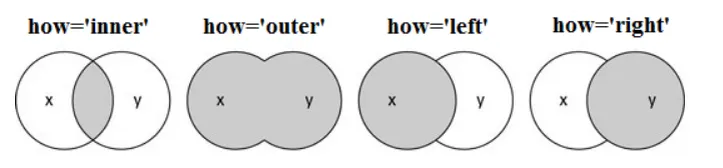

### As operações mais comuns são *concat()*, *merge()* e *join()*.

1. Juntar: join( )


É usado quando se deseja unir DataFrames e os índices não são conflitantes. Por exemplo:


In [ ]:
# Criar os DataFrames de exemplo
data1 = {'A': [1, 2, 3], 'B': [4, 5, 6]}
data2 = {'C': [7, 8, 9], 'D': [10, 11, 12]}

df1 = pd.DataFrame(data1, index=['row1', 'row2', 'row3'])
df2 = pd.DataFrame(data2, index=['row1', 'row2', 'row3'])

print(df1, df2, sep='\n')

      A  B
row1  1  4
row2  2  5
row3  3  6
      C   D
row1  7  10
row2  8  11
row3  9  12


In [ ]:
# Usar o método join para combinar os DataFrames
df_combinado = df1.join(df2)

print(df_combinado)

      A  B  C   D
row1  1  4  7  10
row2  2  5  8  11
row3  3  6  9  12


Estamos usando o método *join* com base nos índices para combinar os DataFrames. Caso 'outer'.

2. Mesclar: merge( )

Se deseja combinar os conjuntos de dados com base em colunas em comum

In [ ]:
# Criar os DataFrames de exemplo
tabela_1 = pd.DataFrame({
'Nome':['João', 'João', 'Pedro' , 'Caio'],
'Telefone': ['12121', '343434', '565656', '787878'],
'Carros': ['azul', 'preto', 'verde' , 'amarelo']})

tabela_1

,Nome,Telefone,Carros
0,João,12121,azul
1,João,343434,preto
2,Pedro,565656,verde
3,Caio,787878,amarelo


In [ ]:
tabela_2 = pd.DataFrame({
'Nome':['João', 'Marcelo', 'Thiago' , 'Caio'],
'Irmãos': ['1', '3', '2' , '2']})

tabela_2

,Nome,Irmãos
0,João,1
1,Marcelo,3
2,Thiago,2
3,Caio,2


O que temos até aqui: duas tabelas com uma única coluna em comum (Nome). Existem dois nomes em comum entre as duas tabelas (João e Caio).

In [ ]:
# how = ‘inner’
# Caso queiramos a interseção exata entre as tabelas:

m = pd.merge(tabela_1, tabela_2, how = 'inner', on = 'Nome')
m

,Nome,Telefone,Carros,Irmãos
0,João,12121,azul,1
1,João,343434,preto,1
2,Caio,787878,amarelo,2


Como somente os valores na coluna “Nome” que existem em ambas tabelas aparecem no nosso resultado.

In [ ]:
# how = ‘outer’
# Caso queiramos todas as informações, de ambas tabelas, fazemos um merge “outer”

m = pd.merge(tabela_1, tabela_2, how = 'outer')
m

,Nome,Telefone,Carros,Irmãos
0,João,12121,azul,1
1,João,343434,preto,1
2,Pedro,565656,verde,NaN
3,Caio,787878,amarelo,2
4,Marcelo,NaN,NaN,3
5,Thiago,NaN,NaN,2


Perceba que:

 "Pedro” não possui dados para “Irmãos”.

 “Marcelo” e “Thiago” não possuem dados para “Telefone” e “Carros”.

Esse é exatamente o resultado esperado se quisermos todas as informações.

**how = ‘left’ ou how= ‘right’**

Um merge “left” ou “right” depende de qual tabela você deixa na direita ou esquerda. Para o seguinte cenário faremos um merge do tipo “left”. Mas o mesmo resultado pode ser obtido com um merge “right” trocando a posição das tabelas no método “merge”.

In [ ]:
## Obtém o mesmo resultado ##
m = pd.merge(tabela_1, tabela_2, how = 'left', on = 'Nome')###################################################
print(m,sep='\n')
m = pd.merge(tabela_2, tabela_1, how = 'right', on = 'Nome')#############################################
print(m)

    Nome Telefone   Carros Irmãos
0   João    12121     azul      1
1   João   343434    preto      1
2  Pedro   565656    verde    NaN
3   Caio   787878  amarelo      2
    Nome Irmãos Telefone   Carros
0   João      1    12121     azul
1   João      1   343434    preto
2  Pedro    NaN   565656    verde
3   Caio      2   787878  amarelo


**Cenário 1**

Suponhamos que para a sua tarefa você deva manter os dados da tabela_1 e ir acrescentando colunas conforme mais dados sobre ‘João’, ‘Pedro’ e ‘Caio’ apareçam. Em outras palavras, somente ‘Nomes’ que existam na tabela_1 serão trazidos da tabela_2. Neste exemplo deixaremos a tabela_1 à esquerda e faremos um merge ‘left’

In [ ]:
m = pd.merge(tabela_1, tabela_2, how = 'left', on = 'Nome')
m

,Nome,Telefone,Carros,Irmãos
0,João,12121,azul,1
1,João,343434,preto,1
2,Pedro,565656,verde,NaN
3,Caio,787878,amarelo,2


Observe que:
1. Não foram incluídos ‘Marcelo’ e ‘Thiago’ pois estavam somente na tabela_2;
2. A coluna ‘Irmãos’, que estava somente na tabela_2 aparece no resultado final
3. Não existem dados de ‘Irmãos’ para ‘Pedro’.

**Cenário 2**

Neste cenário uniremos a tabela_1 à uma nova tabela: tabela_3

In [ ]:
tabela_3 = pd.DataFrame({
'Nome':['João', 'João', 'Pedro' , 'Caio'],
'Telefone': ['12121', '343434', '565656', '787878'],
'Carros': ['BRANCO', 'PRATA', 'PRATA' , 'VERMELHO']})
tabela_3

# Perceba que a nova tabela, tabela_3, é igual a tabela_1 mas com valores novos para a coluna ‘Carros’.

,Nome,Telefone,Carros
0,João,12121,BRANCO
1,João,343434,PRATA
2,Pedro,565656,PRATA
3,Caio,787878,VERMELHO


In [ ]:
pd.merge(tabela_1, tabela_3, how='left', on = 'Nome')

,Nome,Telefone_x,Carros_x,Telefone_y,Carros_y
0,João,12121,azul,12121,BRANCO
1,João,12121,azul,343434,PRATA
2,João,343434,preto,12121,BRANCO
3,João,343434,preto,343434,PRATA
4,Pedro,565656,verde,565656,PRATA
5,Caio,787878,amarelo,787878,VERMELHO


Entendendo:

A nossa chave para o merge sendo ‘Nome’, todas outras colunas iguais entre as tabelas são separadas em _x e _y, onde:

* _x Corresponde aos valores que existiam na tabela da esquerda (tabela_1).
* _y Corresponde aos valores que existiam na tabela da direita (tabela_3).

3. Concatenação: concat()

 Se o objetivo for empilhar os dois conjuntos de dados verticalmente

**Cenário 1**

Vejamos como a método se comporta no último caso, onde queríamos unir tabela_1 e tabela_3.

Lembando: São tabelas com as mesmas colunas.

In [ ]:
pd.concat([tabela_1, tabela_3]) # atenção ao uso dos colchetes

# O método gera uma tabela com todas as combinações de colunas.

,Nome,Telefone,Carros
0,João,12121,azul
1,João,343434,preto
2,Pedro,565656,verde
3,Caio,787878,amarelo
0,João,12121,BRANCO
1,João,343434,PRATA
2,Pedro,565656,PRATA
3,Caio,787878,VERMELHO


**Cenário 2**

Uma nova tabela chamada tabela_4, idêntica à tabela_3, porém com uma coluna a mais, a coluna ‘Animais’ :

In [ ]:
## Nova tabela com a coluna "Animais" ##
tabela_4 = pd.DataFrame({
'Nome':['João', 'João', 'Pedro' ],
'Telefone': ['12121', '343434', '565656'],
'Carros': ['BRANCO', 'PRATA', 'PRATA' ],
'Animais': ['cachorro', 'gato', 'cachorro']})
tabela_4

,Nome,Telefone,Carros,Animais
0,João,12121,BRANCO,cachorro
1,João,343434,PRATA,gato
2,Pedro,565656,PRATA,cachorro


Agora a concatenação entre tabela_1 e tabela_4:

In [ ]:
## sort_values organiza a tabela em sequencia alfabética na coluna 'Nome'
t =pd.concat([tabela_1, tabela_4]).sort_values(by='Nome')
t

,Nome,Telefone,Carros,Animais
3,Caio,787878,amarelo,NaN
0,João,12121,azul,NaN
1,João,343434,preto,NaN
0,João,12121,BRANCO,cachorro
1,João,343434,PRATA,gato
2,Pedro,565656,verde,NaN
2,Pedro,565656,PRATA,cachorro


Como podemos ver, as linhas que vieram da tabela_1 receberam ‘NaN’ na coluna ‘Animais’. Previsivelmente, afinal essa coluna só existe na tabela_4.

# Tratamento de dados




Após a integração dos dados, o proximo passo é realizar o tratamento do nosso dataset resultante, isse é um passo muito importante para garantir a consistencia e credibilidade dos resultados das analises feitas sobre o dataset. Nosso primeiro passo é identificar quais os problemas que o dataset possui, isso pode ser feito por meio de análises exploratórias, afim de encontrar inconsistencias como valores nulos, corrompidos, outliers, etc.

## Analise Exploratória

A análise exploratória orienta o tratamento de dados ao revelar padrões e inconsistências. Ao compreender a distribuição e identificar outliers, essa abordagem informa escolhas de limpeza e preparação, aprimorando a qualidade dos dados para análises subsequentes.

In [ ]:
import pandas as pd
import numpy as np

#importando nosso dataset

df = pd.read_csv('/content/movies.csv')
coluns = ['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES','RunTime', 'Gross']

dataframe = df[coluns].replace('\n', ' ', regex = True)


Com nosso dataFrame criado, o proximo passo é entender os dados que acabamos de coletar, suas dimensões, tipos, valores faltantes etc. Isso é importante para produzir insights sobre as propriedades, desafios e limitações do dataframe

In [ ]:
dataframe.shape

(9999, 9)

In [ ]:
dataframe.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced i...,Director: Peter Thorwarth | Stars: P...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may ...,"Stars: Chris Wood, Sarah Mi...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a co...,"Stars: Andrew Lincoln, Norm...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits ...,"Stars: Justin Roiland, Chri...","414,849",23.0,NaN
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of t...",Director: Matthias Schweighöfer | St...,NaN,NaN,NaN


In [ ]:
dataframe.columns

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime', 'Gross'],
      dtype='object')

In [ ]:
dataframe.dtypes

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object

In [ ]:
dataframe.describe(include = "all")

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
count,9999,9355,9919,8179.000000,9999,9999,8179,7041.000000,460
unique,6817,438,510,NaN,8688,7877,4129,NaN,332
top,Bleach: Burîchi,(2020– ),Comedy,NaN,Add a Plot,,7,NaN,$0.01M
freq,65,892,852,NaN,1265,456,35,NaN,22
mean,NaN,NaN,NaN,6.921176,NaN,NaN,NaN,68.688539,NaN
std,NaN,NaN,NaN,1.220232,NaN,NaN,NaN,47.258056,NaN
min,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,6.200000,NaN,NaN,NaN,36.000000,NaN
50%,NaN,NaN,NaN,7.100000,NaN,NaN,NaN,60.000000,NaN
75%,NaN,NaN,NaN,7.800000,NaN,NaN,NaN,95.000000,NaN


In [ ]:
#Verificando se existem valores Na

dataframe.isna().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [ ]:
dataframe.duplicated().sum()

431

## Limpeza

A limpeza de dados envolve a identificação e remoção de dados que não são pertinentes à analise feita, seja por não estarem correlacionados ou por possuirem algum erro, garantindo que o conjunto de dados seja confiável e não contenha informações inconsistentes que possam prejudicar a análise

In [ ]:
#Lidando com valores faltantes

dataframe = dataframe.fillna({'YEAR':'desconhecido', 'Genre':'desconhecido', 'Gross':'desconhecido', 'VOTES':'desconhecido', })
dataframe = dataframe.fillna({'RunTime' : dataframe['RunTime'].mean()})
dataframe = dataframe.dropna(subset= 'RATING')
dataframe = dataframe.reset_index(drop=True)

dataframe.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced i...,Director: Peter Thorwarth | Stars: P...,"21,062",121.0,desconhecido
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may ...,"Stars: Chris Wood, Sarah Mi...","17,870",25.0,desconhecido
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a co...,"Stars: Andrew Lincoln, Norm...","885,805",44.0,desconhecido
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits ...,"Stars: Justin Roiland, Chri...","414,849",23.0,desconhecido
4,Outer Banks,(2020– ),"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of t...,"Stars: Chase Stokes, Madely...","25,858",50.0,desconhecido


In [ ]:
#lidando com linhas duplicadas
dataframe = dataframe.drop_duplicates()
dataframe.duplicated().sum()

0

In [ ]:
#retirando colunas nao necessarias
dataframe = dataframe.drop('ONE-LINE', axis = 1)
dataframe.head()

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,Director: Peter Thorwarth | Stars: P...,"21,062",121.0,desconhecido
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,"Stars: Chris Wood, Sarah Mi...","17,870",25.0,desconhecido
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,"Stars: Andrew Lincoln, Norm...","885,805",44.0,desconhecido
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,"Stars: Justin Roiland, Chri...","414,849",23.0,desconhecido
4,Outer Banks,(2020– ),"Action, Crime, Drama",7.6,"Stars: Chase Stokes, Madely...","25,858",50.0,desconhecido


In [ ]:
dataframe.describe(include = "all")

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Gross
count,8168,8168,8157,8168.000000,8168,8168,8168.000000,8168
unique,5818,408,484,NaN,6892,4129,NaN,333
top,Bleach: Burîchi,(2020– ),Comedy,NaN,,7,NaN,desconhecido
freq,65,746,740,NaN,84,35,NaN,7708
mean,NaN,NaN,NaN,6.919699,NaN,NaN,69.326954,NaN
std,NaN,NaN,NaN,1.219970,NaN,NaN,43.280477,NaN
min,NaN,NaN,NaN,1.100000,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,6.200000,NaN,NaN,42.000000,NaN
50%,NaN,NaN,NaN,7.100000,NaN,NaN,68.688539,NaN
75%,NaN,NaN,NaN,7.800000,NaN,NaN,90.000000,NaN


In [ ]:
dataframe.head()

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,Director: Peter Thorwarth | Stars: P...,"21,062",121.0,desconhecido
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,"Stars: Chris Wood, Sarah Mi...","17,870",25.0,desconhecido
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,"Stars: Andrew Lincoln, Norm...","885,805",44.0,desconhecido
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,"Stars: Justin Roiland, Chri...","414,849",23.0,desconhecido
4,Outer Banks,(2020– ),"Action, Crime, Drama",7.6,"Stars: Chase Stokes, Madely...","25,858",50.0,desconhecido


## Transformação

A transformação de dados é o processo de pegar dados brutos e transforma-los em dados e estruturas para que se adequem mais as analises e modelagem posteriores

#### Normalização

Normalização de dados é o processo de ajustar os valores de uma variável para uma escala comum, geralmente dentro de um determinado intervalo, para tornar os dados comparáveis e facilitar análises e modelagem. O objetivo da normalização é remover a influência da escala original dos dados, garantindo que todas as variáveis contribuam igualmente para a análise.

A normalização é especialmente útil quando as variáveis possuem diferentes unidades de medida ou escalas, o que pode levar a problemas de ponderação indevida em alguns algoritmos de aprendizado de máquina e análises estatísticas.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()


dataframe['RATING'] = scaler.fit_transform(dataframe[['RATING']])

dataframe.head()

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"Action, Horror, Thriller",0.568182,Director: Peter Thorwarth | Stars: P...,"21,062",121.0,desconhecido
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",0.443182,"Stars: Chris Wood, Sarah Mi...","17,870",25.0,desconhecido
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",0.806818,"Stars: Andrew Lincoln, Norm...","885,805",44.0,desconhecido
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",0.920455,"Stars: Justin Roiland, Chri...","414,849",23.0,desconhecido
4,Outer Banks,(2020– ),"Action, Crime, Drama",0.738636,"Stars: Chase Stokes, Madely...","25,858",50.0,desconhecido


#### engenharia de features

Consiste em criar novas variáveis ou transformar as existentes para destacar informações relevantes e padrões nos dados





In [ ]:

from sklearn.preprocessing import Binarizer


binarizer = Binarizer(threshold = 70.0)

#utilizamos uma tecnica de binarização para separar nossa nova variavel
new_coluna = binarizer.fit_transform(dataframe[['RunTime']])



In [ ]:
#inserindo nova coluna na tabela
dataframe.insert(7, "Tipo Midia", new_coluna, True)

In [ ]:
dataframe.head()

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,Tipo Midia,Gross
0,Blood Red Sky,(2021),"Action, Horror, Thriller",0.568182,Director: Peter Thorwarth | Stars: P...,"21,062",121.0,1.0,desconhecido
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",0.443182,"Stars: Chris Wood, Sarah Mi...","17,870",25.0,0.0,desconhecido
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",0.806818,"Stars: Andrew Lincoln, Norm...","885,805",44.0,0.0,desconhecido
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",0.920455,"Stars: Justin Roiland, Chri...","414,849",23.0,0.0,desconhecido
4,Outer Banks,(2020– ),"Action, Crime, Drama",0.738636,"Stars: Chase Stokes, Madely...","25,858",50.0,0.0,desconhecido
